In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_data.csv")
df

,Unnamed: 0,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.drop("Unnamed: 0", axis =1, inplace=True)
df

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.isnull().sum()

age                       0
annual_income             0
home_ownership            0
employment_length_year    0
loan_intent               0
loan_grade                0
loan_amount               0
interest_rate             0
loan_status               0
percent_income            0
historical_default        0
credit_history_length     0
dtype: int64

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32581 non-null  int64  
 1   annual_income           32581 non-null  int64  
 2   home_ownership          32581 non-null  object 
 3   employment_length_year  32581 non-null  float64
 4   loan_intent             32581 non-null  object 
 5   loan_grade              32581 non-null  object 
 6   loan_amount             32581 non-null  int64  
 7   interest_rate           32581 non-null  float64
 8   loan_status             32581 non-null  int64  
 9   percent_income          32581 non-null  float64
 10  historical_default      32581 non-null  object 
 11  credit_history_length   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [7]:
df.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [8]:
y = df.pop("loan_status")
X = df

In [9]:
print(X.head())
print(y.head())

   age  annual_income home_ownership  employment_length_year loan_intent  \
0   22          59000           RENT                   123.0    PERSONAL   
1   21           9600            OWN                     5.0   EDUCATION   
2   25           9600       MORTGAGE                     1.0     MEDICAL   
3   23          65500           RENT                     4.0     MEDICAL   
4   24          54400           RENT                     8.0     MEDICAL   

  loan_grade  loan_amount  interest_rate  percent_income historical_default  \
0          D        35000          16.02            0.59                  Y   
1          B         1000          11.14            0.10                  N   
2          C         5500          12.87            0.57                  N   
3          C        35000          15.23            0.53                  N   
4          C        35000          14.27            0.55                  Y   

   credit_history_length  
0                      3  
1             

In [10]:
# split the data in to X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24435, 11) (24435,)
(8146, 11) (8146,)


## train data

In [11]:
 X_train.dtypes

age                         int64
annual_income               int64
home_ownership             object
employment_length_year    float64
loan_intent                object
loan_grade                 object
loan_amount                 int64
interest_rate             float64
percent_income            float64
historical_default         object
credit_history_length       int64
dtype: object

In [12]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

In [13]:
X_train_cat.head()

,home_ownership,loan_intent,loan_grade,historical_default
12231,MORTGAGE,PERSONAL,A,N
23891,MORTGAGE,HOMEIMPROVEMENT,A,N
1191,RENT,HOMEIMPROVEMENT,E,N
8463,MORTGAGE,DEBTCONSOLIDATION,A,N
17638,RENT,PERSONAL,D,Y


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output= False)

X_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                                       columns = encoder_.get_feature_names_out(),
                                       index = X_train_cat.index)

print(X_train_cat.shape)
print(X_train_cat_transformed.shape)


X_train_cat_transformed.head()

(24435, 4)
(24435, 15)


,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,historical_default_Y
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
12231
23891
1191
8463
17638


In [16]:
home_ownership_encoder = {'RENT' : 1, 'MORTGAGE' : 2, 'OWN' : 3, 'OTHER' : 4}
loan_intent_encoder = {'MEDICAL':1, 'PERSONAL':2, 'EDUCATION':3, 'HOMEIMPROVEMENT':4, 'DEBTCONSOLIDATION':5, 'VENTURE':6, }
loan_grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
historical_default_encoder = {'Y':1, 'N':2}
# Apply Label Encoding
X_train_cat_transformed['home_ownership'] = X_train_cat['home_ownership'].map(home_ownership_encoder)
X_train_cat_transformed['loan_intent'] = X_train_cat['loan_intent'].map(loan_intent_encoder)
X_train_cat_transformed['loan_grade'] = X_train_cat['loan_grade'].map(loan_grade_encoder)
X_train_cat_transformed['historical_default'] = X_train_cat['historical_default'].map(historical_default_encoder)

X_train_cat_transformed.head()

,home_ownership,loan_intent,loan_grade,historical_default
12231,2,2,1,2
23891,2,4,1,2
1191,1,4,5,2
8463,2,5,1,2
17638,1,2,4,1


In [17]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_num_transformed = pd.DataFrame(scalar.fit_transform(X_train_num),
                                        columns = scalar.get_feature_names_out(),
                                        index = X_train_num.index)

print(X_train_num.shape)
print(X_train_num_transformed.shape)

X_train_num_transformed.head()

(24435, 7)
(24435, 7)


,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length
12231,-0.905024,0.204465,-0.191550,-0.372728,0.000181,-0.751368,-0.690988
23891,0.360863,0.008150,0.285592,0.062224,-1.306708,-0.190787,0.050929
1191,-0.430316,-0.110243,-1.145836,1.106109,1.029752,1.023804,-0.443682
8463,-0.588552,-0.127760,0.047021,-0.412269,-1.306708,-0.471077,-0.443682
17638,-0.588552,-0.308974,-1.145836,-0.574387,1.120741,-0.377647,-0.443682


In [18]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length,home_ownership,loan_intent,loan_grade,historical_default
12231,-0.905024,0.204465,-0.191550,-0.372728,0.000181,-0.751368,-0.690988,2,2,1,2
23891,0.360863,0.008150,0.285592,0.062224,-1.306708,-0.190787,0.050929,2,4,1,2
1191,-0.430316,-0.110243,-1.145836,1.106109,1.029752,1.023804,-0.443682,1,4,5,2
8463,-0.588552,-0.127760,0.047021,-0.412269,-1.306708,-0.471077,-0.443682,2,5,1,2
17638,-0.588552,-0.308974,-1.145836,-0.574387,1.120741,-0.377647,-0.443682,1,2,4,1


## test data

In [19]:
X_test.head()

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,percent_income,historical_default,credit_history_length
2124,24,41300,RENT,2.0,EDUCATION,C,2400,12.68,0.06,N,2
252,24,85000,RENT,5.0,MEDICAL,B,25000,10.62,0.29,N,4
13083,24,88000,MORTGAGE,4.0,MEDICAL,B,6000,9.91,0.07,N,2
12447,23,81120,MORTGAGE,3.0,PERSONAL,B,15000,10.25,0.18,N,4
31009,39,73000,MORTGAGE,3.0,VENTURE,A,10000,7.51,0.14,N,14


In [20]:
X_test_num = X_test.select_dtypes(include= ["int64", "float64"])
X_test_cat = X_test.select_dtypes(include=["object"])

In [21]:
X_test_num_transformed = pd.DataFrame(scalar.transform(X_test_num), 
                                   columns = scalar.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length
2124,-0.588552,-0.379950,-0.668693,-1.139825,0.542313,-1.031658,-0.938293
252,-0.588552,0.279971,0.047021,2.434689,-0.127104,1.117235,-0.443682
13083,-0.588552,0.325274,-0.191550,-0.570433,-0.357825,-0.938228,-0.938293
12447,-0.746788,0.221378,-0.430122,0.853046,-0.247339,0.089503,-0.443682
31009,1.784986,0.098757,-0.430122,0.062224,-1.137729,-0.284217,2.029373


In [22]:
X_test_cat.head()

,home_ownership,loan_intent,loan_grade,historical_default
2124,RENT,EDUCATION,C,N
252,RENT,MEDICAL,B,N
13083,MORTGAGE,MEDICAL,B,N
12447,MORTGAGE,PERSONAL,B,N
31009,MORTGAGE,VENTURE,A,N


In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output= False)

X_test_cat_transformed = pd.DataFrame(encoder_.fit_transform(X_test_cat),
                                       columns = encoder_.get_feature_names_out(),
                                       index = X_test_cat.index)

print(X_test_cat.shape)
print(X_test_cat_transformed.shape)


X_test_cat_transformed.head()

(8146, 4)
(8146, 15)


,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,historical_default_Y
2124,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['home_ownership'] = X_test_cat['home_ownership'].map(home_ownership_encoder)
X_test_cat_transformed['loan_intent'] = X_test_cat['loan_intent'].map(loan_intent_encoder)
X_test_cat_transformed['loan_grade'] = X_test_cat['loan_grade'].map(loan_grade_encoder)
X_test_cat_transformed['historical_default'] = X_test_cat['historical_default'].map(historical_default_encoder)

X_test_cat_transformed.head()

,home_ownership,loan_intent,loan_grade,historical_default
2124,1,3,3,2
252,1,1,2,2
13083,2,1,2,2
12447,2,2,2,2
31009,2,6,1,2


In [25]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,annual_income,employment_length_year,loan_amount,interest_rate,percent_income,credit_history_length,home_ownership,loan_intent,loan_grade,historical_default
2124,-0.588552,-0.379950,-0.668693,-1.139825,0.542313,-1.031658,-0.938293,1,3,3,2
252,-0.588552,0.279971,0.047021,2.434689,-0.127104,1.117235,-0.443682,1,1,2,2
13083,-0.588552,0.325274,-0.191550,-0.570433,-0.357825,-0.938228,-0.938293,2,1,2,2
12447,-0.746788,0.221378,-0.430122,0.853046,-0.247339,0.089503,-0.443682,2,2,2,2
31009,1.784986,0.098757,-0.430122,0.062224,-1.137729,-0.284217,2.029373,2,6,1,2


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(X_train_transformed, y_train)

    y_train_pred = model.predict(X_train_transformed)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test_transformed)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 1.000, test: 0.853
> 2, train: 0.920, test: 0.883
> 3, train: 0.927, test: 0.883
> 4, train: 0.911, test: 0.891
> 5, train: 0.915, test: 0.892
> 6, train: 0.907, test: 0.894
> 7, train: 0.910, test: 0.895
> 8, train: 0.904, test: 0.895
> 9, train: 0.906, test: 0.896
> 10, train: 0.901, test: 0.894
> 11, train: 0.904, test: 0.895
> 12, train: 0.900, test: 0.894
> 13, train: 0.901, test: 0.895
> 14, train: 0.899, test: 0.893
> 15, train: 0.901, test: 0.895
> 16, train: 0.898, test: 0.892
> 17, train: 0.899, test: 0.892
> 18, train: 0.897, test: 0.893
> 19, train: 0.898, test: 0.894
> 20, train: 0.896, test: 0.893


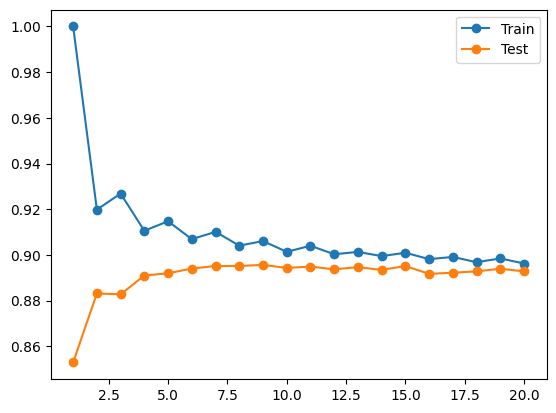

In [27]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## cross validation

# RandomizedSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

In [33]:
 tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [35]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13, p=1)

Score on Test Data:  0.9001964154186104


In [47]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

tuned_parameters = [{'alpha': [0.1, 1.0, 10.0]}]

clf = GridSearchCV(
    estimator=Ridge(max_iter=5000),
    param_grid=tuned_parameters,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True,
    verbose=1
)

clf.fit(X_train_transformed, y_train)


# Make predictions
predictions = clf.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:",r2)



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 0.115932394185403
R-squared Score: 0.2867672649336115


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

tuned_parameters = [{'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    scoring='neg_mean_squared_error',  # Use appropriate regression scoring metric
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)


# Make predictions
predictions = clf.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:",r2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Squared Error: 0.07021851215320403
R-squared Score: 0.5680056309780932


In [ ]:
def diffrence(s):
    for i in s:
        product = product * int(i)
        sum = sum + int(i)
    
num = int(input())
s = str(num)
product = 1`
sum = 0
diffrence(product - sum) 
